In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import RandomOverSampler

In [3]:
df = pd.read_csv("C:/Users/ASUS/Downloads/loan_data_2007_2014.csv")
df = df.loc[:,'member_id':]
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27056\4199429398.py:1: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:/Users/ASUS/Downloads/loan_data_2007_2014.csv")


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,18400.0,60 months,14.47,432.64,C,C2,Financial Advisor,...,NaN,NaN,NaN,NaN,NaN,NaN,29900.0,NaN,NaN,NaN
466281,11536848,22000,22000,22000.0,60 months,19.97,582.50,D,D5,Chief of Interpretation (Park Ranger),...,NaN,NaN,NaN,NaN,NaN,NaN,39400.0,NaN,NaN,NaN
466282,11436914,20700,20700,20700.0,60 months,16.99,514.34,D,D1,patrol,...,NaN,NaN,NaN,NaN,NaN,NaN,13100.0,NaN,NaN,NaN
466283,11457002,2000,2000,2000.0,36 months,7.90,62.59,A,A4,Server Engineer Lead,...,NaN,NaN,NaN,NaN,NaN,NaN,53100.0,NaN,NaN,NaN


# **Data Understanding**

In [4]:
credit_risk_df = df[['member_id','loan_amnt','funded_amnt','term','int_rate','installment','emp_length','annual_inc','verification_status','loan_status']]
credit_risk_df

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36 months,10.65,162.87,10+ years,24000.0,Verified,Fully Paid
1,1314167,2500,2500,60 months,15.27,59.83,< 1 year,30000.0,Source Verified,Charged Off
2,1313524,2400,2400,36 months,15.96,84.33,10+ years,12252.0,Not Verified,Fully Paid
3,1277178,10000,10000,36 months,13.49,339.31,10+ years,49200.0,Source Verified,Fully Paid
4,1311748,3000,3000,60 months,12.69,67.79,1 year,80000.0,Source Verified,Current
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60 months,14.47,432.64,4 years,110000.0,Source Verified,Current
466281,11536848,22000,22000,60 months,19.97,582.50,10+ years,78000.0,Verified,Charged Off
466282,11436914,20700,20700,60 months,16.99,514.34,7 years,46000.0,Verified,Current
466283,11457002,2000,2000,36 months,7.90,62.59,3 years,83000.0,Verified,Fully Paid


In [5]:
credit_risk_df.shape

(466285, 10)

In [6]:
credit_risk_df.dtypes

member_id                int64
loan_amnt                int64
funded_amnt              int64
term                    object
int_rate               float64
installment            float64
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
dtype: object

# **Data Cleaning**

In [7]:
#Change term format from (n months) to (n) and change it to integer
credit_risk_df['term'] = list(map(lambda x: x.replace(" months",""),credit_risk_df['term']))
credit_risk_df['term'] = list(map(int,credit_risk_df['term']))
credit_risk_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27056\203768335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['term'] = list(map(lambda x: x.replace(" months",""),credit_risk_df['term']))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27056\203768335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['term'] = list(map(int,credit_risk_df['term']))


,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36,10.65,162.87,10+ years,24000.0,Verified,Fully Paid
1,1314167,2500,2500,60,15.27,59.83,< 1 year,30000.0,Source Verified,Charged Off
2,1313524,2400,2400,36,15.96,84.33,10+ years,12252.0,Not Verified,Fully Paid
3,1277178,10000,10000,36,13.49,339.31,10+ years,49200.0,Source Verified,Fully Paid
4,1311748,3000,3000,60,12.69,67.79,1 year,80000.0,Source Verified,Current
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4 years,110000.0,Source Verified,Current
466281,11536848,22000,22000,60,19.97,582.50,10+ years,78000.0,Verified,Charged Off
466282,11436914,20700,20700,60,16.99,514.34,7 years,46000.0,Verified,Current
466283,11457002,2000,2000,36,7.90,62.59,3 years,83000.0,Verified,Fully Paid


In [8]:
#Change emp_length from (n(+) years/year) to (n) and turn it to integer
credit_risk_df['emp_length'] = list(map(lambda x: str(x).replace(" years","").replace(" year",""),credit_risk_df['emp_length']))
credit_risk_df.loc[credit_risk_df['emp_length'] == "10+", ['emp_length']] = '11' #More than 10 set to 11
credit_risk_df.loc[credit_risk_df['emp_length'] == "< 1", ['emp_length']] = '0' #Less than 1 set to 0
credit_risk_df['emp_length'] = list(map(float,credit_risk_df['emp_length']))
credit_risk_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27056\575590182.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['emp_length'] = list(map(lambda x: str(x).replace(" years","").replace(" year",""),credit_risk_df['emp_length']))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27056\575590182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['emp_length'] = list(map(float,credit_risk_df['emp_length']))


,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36,10.65,162.87,11.0,24000.0,Verified,Fully Paid
1,1314167,2500,2500,60,15.27,59.83,0.0,30000.0,Source Verified,Charged Off
2,1313524,2400,2400,36,15.96,84.33,11.0,12252.0,Not Verified,Fully Paid
3,1277178,10000,10000,36,13.49,339.31,11.0,49200.0,Source Verified,Fully Paid
4,1311748,3000,3000,60,12.69,67.79,1.0,80000.0,Source Verified,Current
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4.0,110000.0,Source Verified,Current
466281,11536848,22000,22000,60,19.97,582.50,11.0,78000.0,Verified,Charged Off
466282,11436914,20700,20700,60,16.99,514.34,7.0,46000.0,Verified,Current
466283,11457002,2000,2000,36,7.90,62.59,3.0,83000.0,Verified,Fully Paid


In [9]:
#Change verification format from string to
# 0 = Not Verified
# 1 = Source Verified
# 2 = Verified
credit_risk_df['verification_status'] = credit_risk_df['verification_status'].map({'Not Verified' :0, 'Source Verified' :1, 'Verified' :2}).astype(int)
credit_risk_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27056\172975932.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['verification_status'] = credit_risk_df['verification_status'].map({'Not Verified' :0, 'Source Verified' :1, 'Verified' :2}).astype(int)


,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36,10.65,162.87,11.0,24000.0,2,Fully Paid
1,1314167,2500,2500,60,15.27,59.83,0.0,30000.0,1,Charged Off
2,1313524,2400,2400,36,15.96,84.33,11.0,12252.0,0,Fully Paid
3,1277178,10000,10000,36,13.49,339.31,11.0,49200.0,1,Fully Paid
4,1311748,3000,3000,60,12.69,67.79,1.0,80000.0,1,Current
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4.0,110000.0,1,Current
466281,11536848,22000,22000,60,19.97,582.50,11.0,78000.0,2,Charged Off
466282,11436914,20700,20700,60,16.99,514.34,7.0,46000.0,2,Current
466283,11457002,2000,2000,36,7.90,62.59,3.0,83000.0,2,Fully Paid


In [10]:
##Change loan_status from string to
# 0 = Fully Paid
# 1 = Charged Off
# 2 = Current
# 3 = Default
# 4 = Late (31-120 days)
# 5 = In Grace Period
# 6 = Late (16-30 days)
# 7 = Does not meet the credit policy. Status:Fully Paid
# 8 = Does not meet the credit policy. Status:Charged Off
credit_risk_df['loan_status'] = credit_risk_df['loan_status'].map({'Fully Paid' :0, 'Charged Off' :1, 'Current' :2, 'Default' :3, 'Late (31-120 days)' :4, 'In Grace Period' :5, 'Late (16-30 days)' :6, 'Does not meet the credit policy. Status:Fully Paid' :7, 'Does not meet the credit policy. Status:Charged Off' :8}).astype(int)
credit_risk_df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27056\565438210.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_risk_df['loan_status'] = credit_risk_df['loan_status'].map({'Fully Paid' :0, 'Charged Off' :1, 'Current' :2, 'Default' :3, 'Late (31-120 days)' :4, 'In Grace Period' :5, 'Late (16-30 days)' :6, 'Does not meet the credit policy. Status:Fully Paid' :7, 'Does not meet the credit policy. Status:Charged Off' :8}).astype(int)


,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status,loan_status
0,1296599,5000,5000,36,10.65,162.87,11.0,24000.0,2,0
1,1314167,2500,2500,60,15.27,59.83,0.0,30000.0,1,1
2,1313524,2400,2400,36,15.96,84.33,11.0,12252.0,0,0
3,1277178,10000,10000,36,13.49,339.31,11.0,49200.0,1,0
4,1311748,3000,3000,60,12.69,67.79,1.0,80000.0,1,2
...,...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4.0,110000.0,1,2
466281,11536848,22000,22000,60,19.97,582.50,11.0,78000.0,2,1
466282,11436914,20700,20700,60,16.99,514.34,7.0,46000.0,2,2
466283,11457002,2000,2000,36,7.90,62.59,3.0,83000.0,2,0


In [11]:
credit_risk_df = credit_risk_df.dropna()

# **Data Visualization**

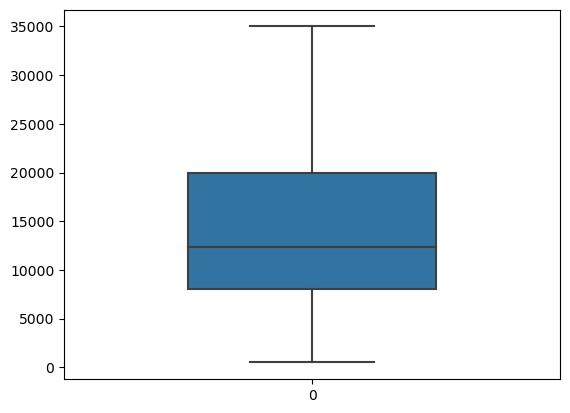

In [12]:
loan_amnt = sns.boxplot(data=credit_risk_df['loan_amnt'], width=0.5)

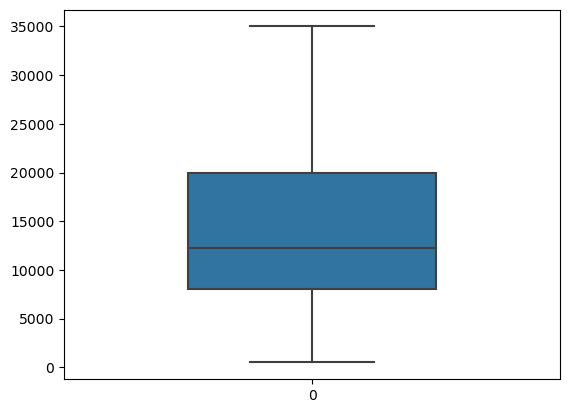

In [13]:
funded_amnt	 = sns.boxplot(data=credit_risk_df['funded_amnt'], width=0.5)

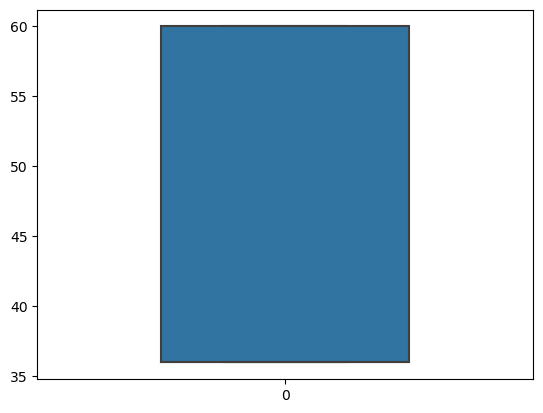

In [14]:
term = sns.boxplot(data=credit_risk_df['term'], width=0.5)

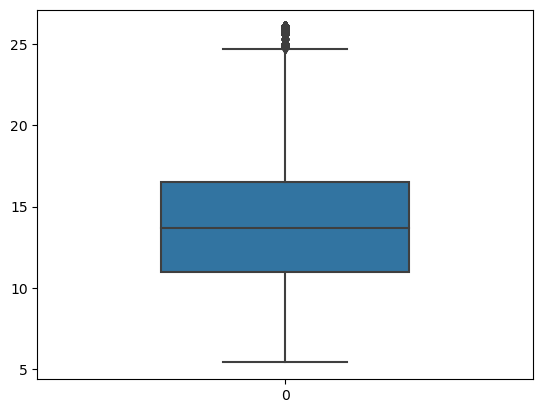

In [15]:
int_rate = sns.boxplot(data=credit_risk_df['int_rate'], width=0.5)

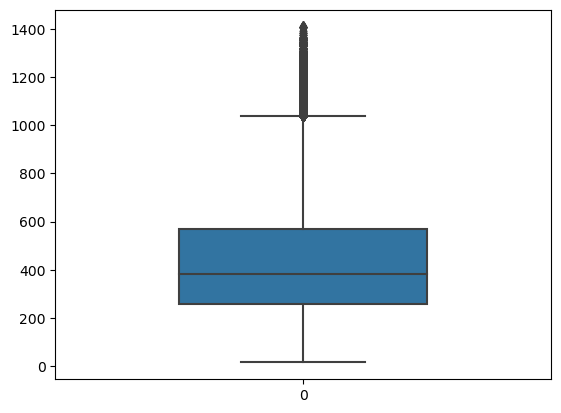

In [16]:
installment = sns.boxplot(data=credit_risk_df['installment'], width=0.5)

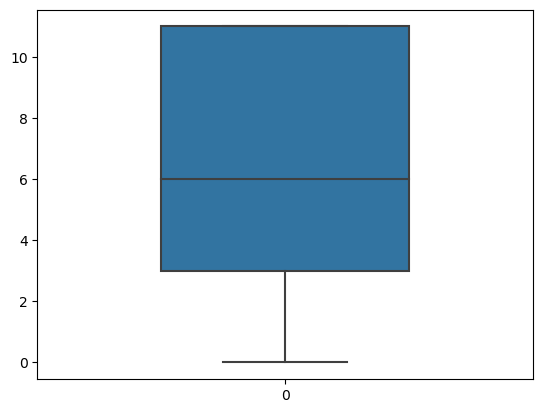

In [17]:
emp_length = sns.boxplot(data=credit_risk_df['emp_length'], width=0.5)

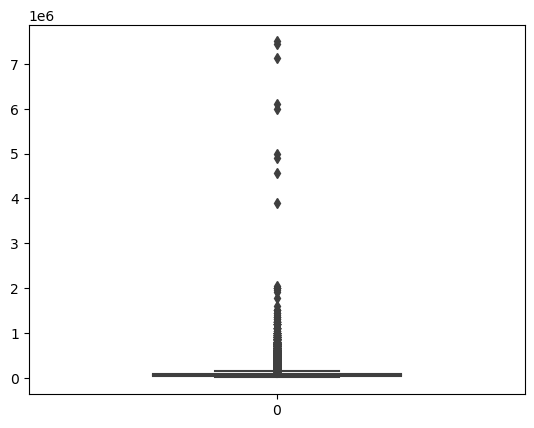

In [18]:
annual_inc = sns.boxplot(data=credit_risk_df['annual_inc'], width=0.5)

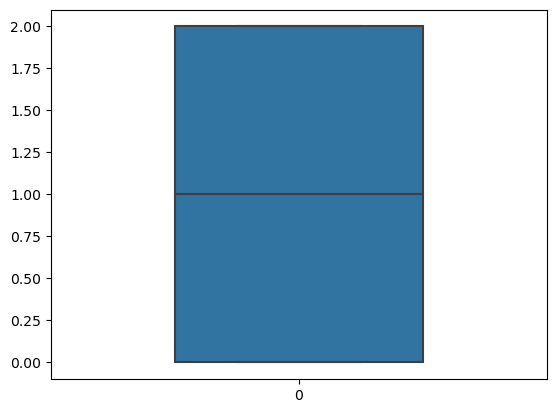

In [19]:
verification_status = sns.boxplot(data=credit_risk_df['verification_status'], width=0.5)

# **Preprocessing**

In [53]:
X_data = credit_risk_df.loc[:,:'verification_status'] 
X_data 

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status
0,1296599,5000,5000,36,10.65,162.87,11.0,24000.0,2
1,1314167,2500,2500,60,15.27,59.83,0.0,30000.0,1
2,1313524,2400,2400,36,15.96,84.33,11.0,12252.0,0
3,1277178,10000,10000,36,13.49,339.31,11.0,49200.0,1
4,1311748,3000,3000,60,12.69,67.79,1.0,80000.0,1
...,...,...,...,...,...,...,...,...,...
466280,1440975,18400,18400,60,14.47,432.64,4.0,110000.0,1
466281,11536848,22000,22000,60,19.97,582.50,11.0,78000.0,2
466282,11436914,20700,20700,60,16.99,514.34,7.0,46000.0,2
466283,11457002,2000,2000,36,7.90,62.59,3.0,83000.0,2


In [54]:
Y = credit_risk_df['loan_status'] 
Y

0         0
1         1
2         0
3         0
4         2
         ..
466280    2
466281    1
466282    2
466283    0
466284    2
Name: loan_status, Length: 445273, dtype: int32

In [55]:
#UnderSampling
#oversample = RandomOverSampler(sampling_strategy='minority')
#X_data, Y = oversample.fit_resample(X_data, Y)

In [56]:
#Define Scaler

scaler = MinMaxScaler()

In [57]:
X_data = scaler.fit_transform(X_data)
X =  pd.DataFrame(X_data,columns=['member_id','loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'verification_status'])
X

,member_id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,annual_inc,verification_status
0,0.030059,0.130435,0.130435,0.0,0.253391,0.105571,1.000000,0.002948,1.0
1,0.030490,0.057971,0.057971,1.0,0.477229,0.031671,0.000000,0.003748,0.5
2,0.030474,0.055072,0.055072,0.0,0.510659,0.049243,1.000000,0.001381,0.0
3,0.029583,0.275362,0.275362,0.0,0.390988,0.232113,1.000000,0.006309,0.5
4,0.030431,0.072464,0.072464,1.0,0.352229,0.037380,0.090909,0.010416,0.5
...,...,...,...,...,...,...,...,...,...
445268,0.033599,0.518841,0.518841,1.0,0.438469,0.299049,0.363636,0.014418,0.5
445269,0.281105,0.623188,0.623188,1.0,0.704942,0.406528,1.000000,0.010150,1.0
445270,0.278655,0.585507,0.585507,1.0,0.560562,0.357644,0.636364,0.005882,1.0
445271,0.279148,0.043478,0.043478,0.0,0.120155,0.033651,0.272727,0.010817,1.0


In [58]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
y_dummy = np_utils.to_categorical(encoded_Y)

# **Modelling**

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state = 1)

In [60]:
X_train.shape

(356218, 9)

In [61]:
neurons = 64
epochs  = 10
model = Sequential()

model.add(Dense(neurons, input_dim=9, activation='relu'))
model.add(Dense(18))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mean_squared_error',optimizer='adam', metrics=['accuracy'])

In [62]:
history = model.fit(X_train, y_train,epochs=epochs, verbose=1,validation_split=0.33)

Epoch 1/10
7459/7459 [==============================] - 9s 961us/step - loss: 1.3583 - accuracy: 0.1737 - val_loss: 1.3578 - val_accuracy: 0.1920
Epoch 2/10
7459/7459 [==============================] - 7s 884us/step - loss: 1.3359 - accuracy: 0.1933 - val_loss: 1.3462 - val_accuracy: 0.1946
Epoch 3/10
7459/7459 [==============================] - 7s 878us/step - loss: 1.3303 - accuracy: 0.1952 - val_loss: 1.3432 - val_accuracy: 0.1919
Epoch 4/10
7459/7459 [==============================] - 7s 879us/step - loss: 1.3277 - accuracy: 0.1959 - val_loss: 1.3496 - val_accuracy: 0.2126
Epoch 5/10
7459/7459 [==============================] - 7s 881us/step - loss: 1.3268 - accuracy: 0.1972 - val_loss: 1.3429 - val_accuracy: 0.1889
Epoch 6/10
7459/7459 [==============================] - 7s 892us/step - loss: 1.3264 - accuracy: 0.1977 - val_loss: 1.3412 - val_accuracy: 0.2014
Epoch 7/10
7459/7459 [==============================] - 7s 913us/step - loss: 1.3261 - accuracy: 0.1978 - val_loss: 1.3444 -

In [63]:
predictions = model.predict(X_test)

2783/2783 [==============================] - 2s 745us/step


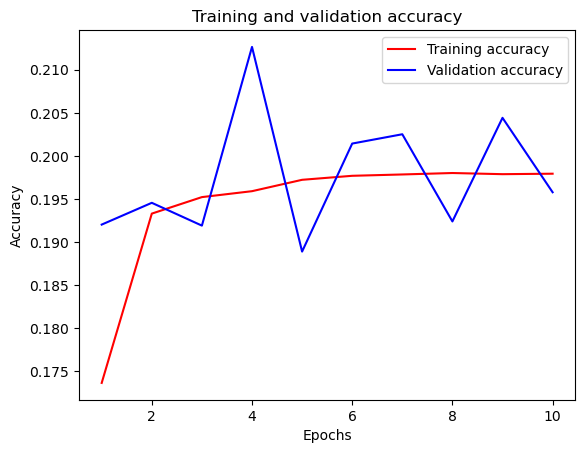

In [64]:
history_dict = history.history

# learning curve
# accuracy
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

# loss
loss = history_dict['loss']
val_loss = history_dict['val_loss']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "r" is for "solid red line"
plt.plot(epochs, acc, 'r', label='Training accuracy')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model.predict(X) 
print(preds[0]) 
print(np.sum(preds[0])) 

matrix = confusion_matrix(y_dummy.argmax(axis=1), preds.argmax(axis=1))
matrix

print(classification_report(y_dummy.argmax(axis=1), preds.argmax(axis=1)))


210/210 [==============================] - 0s 506us/step
[0.9999784]
0.9999784
              precision    recall  f1-score   support

           0       0.11      1.00      0.20       746
           1       0.00      0.00      0.00       746
           2       0.00      0.00      0.00       746
           3       0.00      0.00      0.00       746
           4       0.00      0.00      0.00       746
           5       0.00      0.00      0.00       746
           6       0.00      0.00      0.00       746
           7       0.00      0.00      0.00       746
           8       0.00      0.00      0.00       746

    accuracy                           0.11      6714
   macro avg       0.01      0.11      0.02      6714
weighted avg       0.01      0.11      0.02      6714



C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
